# Clasificador Bayesiano Ingenuo
En el presente estudio, se realiza el análisis y modelado de un conjunto de datos relacionado con el uso de tarjetas de crédito. El clasificador Bayesiano Ingenuo en este ejemplo se utiliza para predecir la clase de nuevas transacciones (legítima o fraudulenta) en función de las características observadas en esas transacciones, utilizando el teorema de Bayes y asumiendo independencia condicional entre las características.

In [ ]:
#Cargamos librerias
import numpy as np #manejo de arreglos

import matplotlib.pyplot as plt #gráficos
import pandas as pd

from sklearn.decomposition import PCA #Componentes principales
from sklearn.preprocessing import StandardScaler #Escalado de datos

from sklearn.naive_bayes import GaussianNB #clasificador bayesiano ingenuo
# se pueden probar otros, por ej. MultinomialNB.
# La lista completa está acá: https://scikit-learn.org/stable/modules/naive_bayes.html

# matriz de confusión: https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# curva roc
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Tamaño de gráficos
plt.rcParams["figure.figsize"] = (8,8)

# Datos y exploración

In [ ]:
# Cargamos el conjunto de datos desde un archivo CSV.
datos = pd.read_csv('/content/tarjetas.csv', header=0, delimiter=";", decimal=",")

In [ ]:
#Verificamos que ya no haya valore nulos
# Obtener una máscara booleana que indica dónde están los valores nulos
mask_nulos = datos.isnull()

# Obtener las filas donde hay valores nulos para cada columna
filas_con_nulos_por_columna = {col: datos[mask_nulos[col]].index.tolist() for col in datos.columns}

# Mostrar las filas con valores nulos por columna
for col, filas in filas_con_nulos_por_columna.items():
    print(f"Columna '{col}': Valores nulos en filas {filas}")

# Eliminar la fila en la posición 10000, 10001, 10002, 10003, 10004
# Obtener las posiciones de las filas a eliminar
filas_a_eliminar = [14474]

# Eliminar las filas con valores nulos en las posiciones especificadas
datos.drop(filas_a_eliminar, inplace=True)

Columna 'id': Valores nulos en filas []
Columna 'V1': Valores nulos en filas []
Columna 'V2': Valores nulos en filas []
Columna 'V3': Valores nulos en filas []
Columna 'V4': Valores nulos en filas []
Columna 'V5': Valores nulos en filas []
Columna 'V6': Valores nulos en filas []
Columna 'V7': Valores nulos en filas []
Columna 'V8': Valores nulos en filas []
Columna 'V9': Valores nulos en filas []
Columna 'V10': Valores nulos en filas []
Columna 'V11': Valores nulos en filas []
Columna 'V12': Valores nulos en filas []
Columna 'V13': Valores nulos en filas []
Columna 'V14': Valores nulos en filas []
Columna 'V15': Valores nulos en filas []
Columna 'V16': Valores nulos en filas []
Columna 'V17': Valores nulos en filas []
Columna 'V18': Valores nulos en filas []
Columna 'V19': Valores nulos en filas []
Columna 'V20': Valores nulos en filas []
Columna 'V21': Valores nulos en filas []
Columna 'V22': Valores nulos en filas []
Columna 'V23': Valores nulos en filas []
Columna 'V24': Valores nul

In [ ]:
#Excluimos de la base las columnas de variables categoricas
datos = datos.drop("id", axis=1)

datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22405 entries, 0 to 22405
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      22405 non-null  float64
 1   V2      22405 non-null  float64
 2   V3      22405 non-null  float64
 3   V4      22405 non-null  float64
 4   V5      22405 non-null  float64
 5   V6      22405 non-null  float64
 6   V7      22405 non-null  float64
 7   V8      22405 non-null  float64
 8   V9      22405 non-null  float64
 9   V10     22405 non-null  float64
 10  V11     22405 non-null  float64
 11  V12     22405 non-null  float64
 12  V13     22405 non-null  float64
 13  V14     22405 non-null  float64
 14  V15     22405 non-null  float64
 15  V16     22405 non-null  float64
 16  V17     22405 non-null  float64
 17  V18     22405 non-null  float64
 18  V19     22405 non-null  float64
 19  V20     22405 non-null  float64
 20  V21     22405 non-null  float64
 21  V22     22405 non-null  float64
 22

In [ ]:
frecuencia_genero = datos['Class'].value_counts()

# Mostrar los valores y su frecuencia
print(frecuencia_genero)

1    12444
0     9961
Name: Class, dtype: int64


Operaciones fraudulentas: 12444

In [ ]:
# Extraigo variables (predictoras, features, características)
X = datos.iloc[:, :-1]
print(X.shape)


# Extraigo clasificación (target, labels, etiquetas)
y = datos.iloc[:, -1]
print(X.shape)

(22405, 29)
(22405, 29)


In [ ]:
# Escalo los datos: en general es buena idea para que el algoritmo funcione mejor
scaler = StandardScaler()
scaler.fit(X) #calcula promedio y desvío
X = scaler.transform(X) #estandariza con promedio y desvío antes calculado
print(datos)

                 V1            V2            V3            V4            V5  \
0     -2.606480e+16 -4.696480e+16  2.496270e+16 -8.372390e+15  1.296810e+15   
1      9.851000e+15 -3.560450e+15  5.580560e+15 -4.296540e+15  2.771400e+15   
2     -2.602720e+16 -9.493850e+15  1.728540e+16 -4.579860e+15  7.406170e+15   
3     -1.521520e+16 -5.089590e+14  1.746840e+15 -1.090180e+15  2.494860e+15   
4     -2.068200e+15 -1.652800e+16  1.527050e+16 -4.482930e+16  1.061250e+16   
...             ...           ...           ...           ...           ...   
22401  1.350020e+16 -2.426400e+16 -1.056680e+16 -3.497110e+16  6.218150e+14   
22402 -2.825890e+16 -9.005580e+14  1.172010e+16 -2.958920e+15  2.163700e+14   
22403 -7.449030e+15  3.814160e+15 -7.641220e+14  1.901660e+16 -1.896090e+15   
22404  8.703780e+15 -2.590560e+16  7.171470e+15  4.256320e+16  1.503680e+16   
22405 -4.913440e+15  8.793130e+15 -1.210870e+16  1.627500e+16 -1.005660e+16   

                 V6            V7            V8    

# Clasificador bayesiano ingenuo

In [ ]:
#
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

Exactitud : 0.9144833742468199
Sensibilidad : [0.97670917 0.86467374]
Precisión : [0.85244896 0.97889374]
F1 : [0.91035838 0.91824543]
False Positive Rate (FPR): 0.023290834253588997
False Negative Rate (FNR): 0.13532626165220185


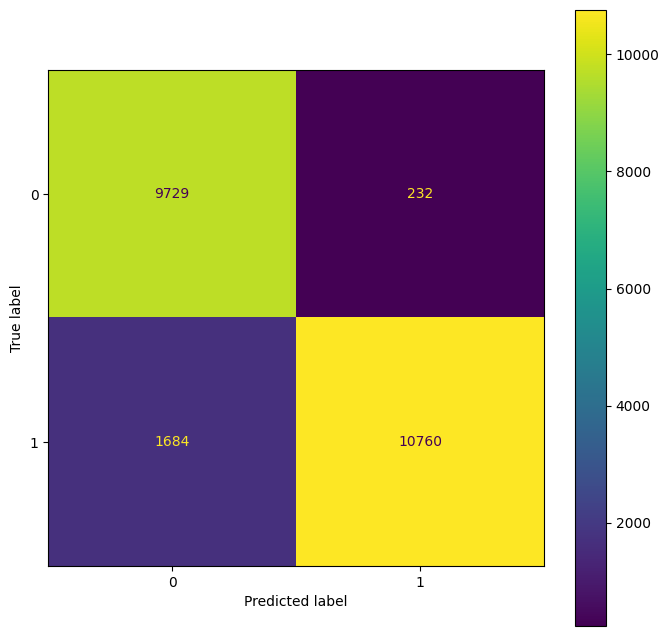

In [ ]:
gnb = GaussianNB() #instancio la clase
modelo_gnb = gnb.fit(X, y) #entreno modelo predictivo a partir de los datos, es decir construyo en borde de decisión
y_pred = modelo_gnb.predict(X) #clasifico según modelo. Por defecto clasifica según la clase con probablidad más alta

# Es una mala idea predecir con los mismos datos de entrenamiento: recordar que el objetivo es
# predecir la clasif. de datos NUEVOS no utilizados para entrenar el modelo.
# Por ahora lo dejamos así, pero pueden investigar si quieren y pueden.

# matriz de confusión
conf = confusion_matrix(y,y_pred)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=gnb.classes_)
disp.plot(values_format='d')

# defino variables para metricas
tn, fp, fn, tp = conf.ravel()

# Calcula el False Positive Rate (FPR) y el False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

#Metricas del modelo
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred, average=None)
precision = precision_score(y, y_pred, average=None)
f1 = f1_score(y, y_pred, average=None)
#Imprimimos metricas
print(f"Exactitud : {accuracy}")
print(f"Sensibilidad : {recall}")
print(f"Precisión : {precision}")
print(f"F1 : {f1}")
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)




>Exactitud o Accuracy: proporcion de predicciones correctas

      **0.91**


> Recall o Sencibilidad:

  De los positivos reales cuantos clasifique correctamente [TP/(TP+FN)]
    
    **0.86**

  De los negativos reales cuantos clasifique correctamente [TN/(TN+FP)]

    **0.97**

> Precisión:

  De los positivos clasificados cuantos son reales [TP/(TP+FP)]

    **0.97**
  De los negativos clasificados cuantos son reales [TN/(TN+FN)]

    **0.85**
  

> F1: combina recall y precisión

    ** 0.91**

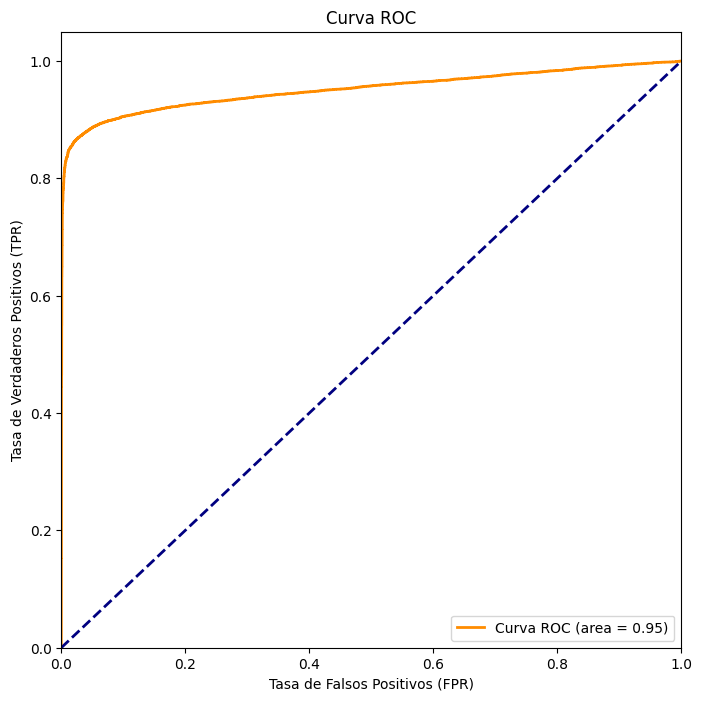

In [ ]:
y_probs = modelo_gnb.predict_proba(X)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y, y_probs)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y, y_probs)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Clasificación por punto de corte arbitrario

[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.76 0.24]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.9  0.1 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.5  0.5 ]]
Exactitud : 0.9010935059138585
Sensibilidad : [0.89418733 0.90662167]
Precisión : [0.88459629 0.91455901]
F1 : [0.88936595 0.91057304]
False Positive Rate (FPR): 0.10581266941070173
False Negative Rate (FNR): 0.09337833494053359


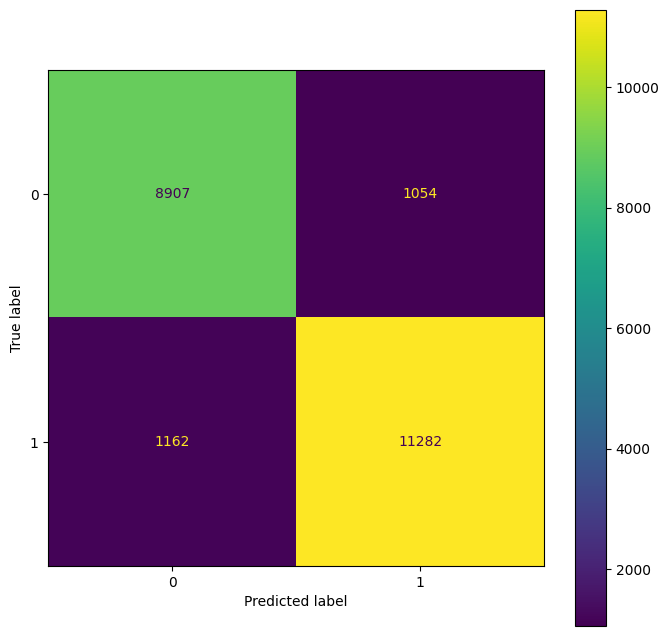

In [ ]:
probas = gnb.predict_proba(X) #probabilidades de cada clase según modelo predictivo
# inspecciono esas probabilidades
with np.printoptions(precision=2, suppress=True):
    print(probas[0:20])

# array de predicciones
y_pred_09= np.ones(y_pred.shape)

# marco el umbral de probabilidad para los casos negativos en 0.99
# solo clasificará como negativo cuando haya un 0.99 probabilidad de acertar
for i in range(probas.shape[0]):
    if (probas[i,0]>0.99):
        y_pred_09[i]=0.

# matriz de confusión
conf_09 = confusion_matrix(y,y_pred_09)

disp_09 = ConfusionMatrixDisplay(confusion_matrix=conf_09, display_labels=gnb.classes_)
disp_09.plot(values_format='d')

# defino variables para metricas
tn_09, fp_09, fn_09, tp_09 = conf_09.ravel()

# Calcula el False Positive Rate (FPR) y el False Negative Rate (FNR)
fpr_09 = fp_09 / (fp_09 + tn_09)
fnr_09 = fn_09 / (fn_09 + tp_09)

#Metricas del modelo
accuracy_09 = accuracy_score(y, y_pred_09)
recall_09 = recall_score(y, y_pred_09, average=None)
precision_09 = precision_score(y, y_pred_09, average=None)
f1_09 = f1_score(y, y_pred_09, average=None)
#Imprimimos metricas
print(f"Exactitud : {accuracy_09}")
print(f"Sensibilidad : {recall_09}")
print(f"Precisión : {precision_09}")
print(f"F1 : {f1_09}")
print("False Positive Rate (FPR):", fpr_09)
print("False Negative Rate (FNR):", fnr_09)

El objetivo es bajar la cantidad de falsos negativos, para minimizar la cantidad de operaciones fraudulentas que no detecta el algoritmo.
Si marcamos el umbral de probabilidad en 0.99 la cantidad de falsos negativos baja a 1162 (cuando antes estaba en 1684). A su vez los falsos positivos aumentan a 1054 (cuando antes eran 232), pero en este contexto es más favorable este restultado.


*Esto lo podemos observar en los errores tipo I y II.*

En el primer Bayes:

False Positive Rate (**FPR**): 0.023290834253588997

False Negative Rate (**FNR**): 0.13532626165220185

En este:

False Positive Rate (**FPR**): 0.1058126694107017

False Negative Rate (**FNR**): 0.09337833494053359

Exactitud o Accuracy: proporcion de predicciones correctas

      0.90


> Recall o Sencibilidad:

  De los positivos reales cuantos clasifique correctamente [TP/(TP+FN)]
    
    0.90
    Anterior : 0.86

  De los negativos reales cuantos clasifique correctamente [TN/(TN+FP)]

    0.89
    Anterior : 0.97

> Precisión:

  De los positivos clasificados cuantos son reales [TP/(TP+FP)]

    0.91
    Anterior : 0.97
  De los negativos clasificados cuantos son reales [TN/(TN+FN)]

    0.88
    Anterior : 0.85
  

> F1: combina recall y precisión

    0.91

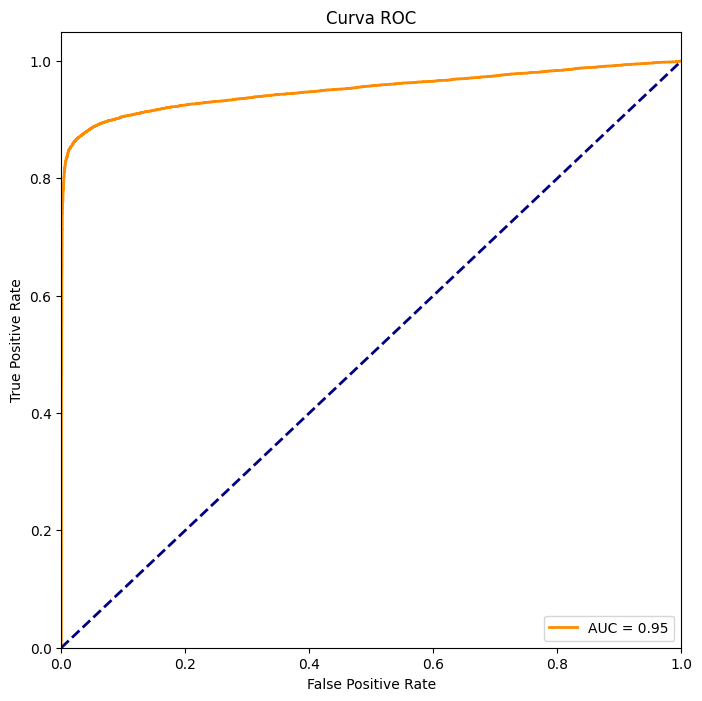

In [ ]:
fpr_09, tpr_09, thresholds = roc_curve(y, probas[:, 1])  # Utiliza las probabilidades de la clase positiva

# Calcular el área bajo la curva ROC (AUC-ROC)
roc_auc = auc(fpr_09, tpr_09)

# Dibuja la curva ROC
plt.figure()
plt.plot(fpr_09, tpr_09, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Visualizar resultados por Componentes principales

In [ ]:

labels = datos.columns[:-1]

print("Longitud de labels:", len(labels))

datos.info()

Longitud de labels: 29
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22405 entries, 0 to 22405
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      22405 non-null  float64
 1   V2      22405 non-null  float64
 2   V3      22405 non-null  float64
 3   V4      22405 non-null  float64
 4   V5      22405 non-null  float64
 5   V6      22405 non-null  float64
 6   V7      22405 non-null  float64
 7   V8      22405 non-null  float64
 8   V9      22405 non-null  float64
 9   V10     22405 non-null  float64
 10  V11     22405 non-null  float64
 11  V12     22405 non-null  float64
 12  V13     22405 non-null  float64
 13  V14     22405 non-null  float64
 14  V15     22405 non-null  float64
 15  V16     22405 non-null  float64
 16  V17     22405 non-null  float64
 17  V18     22405 non-null  float64
 18  V19     22405 non-null  float64
 19  V20     22405 non-null  float64
 20  V21     22405 non-null  float64
 21  V22     2240

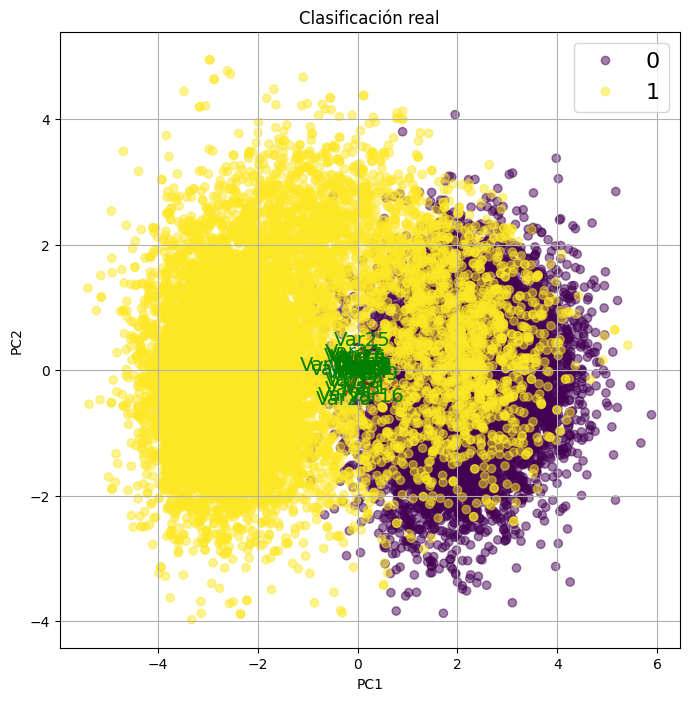

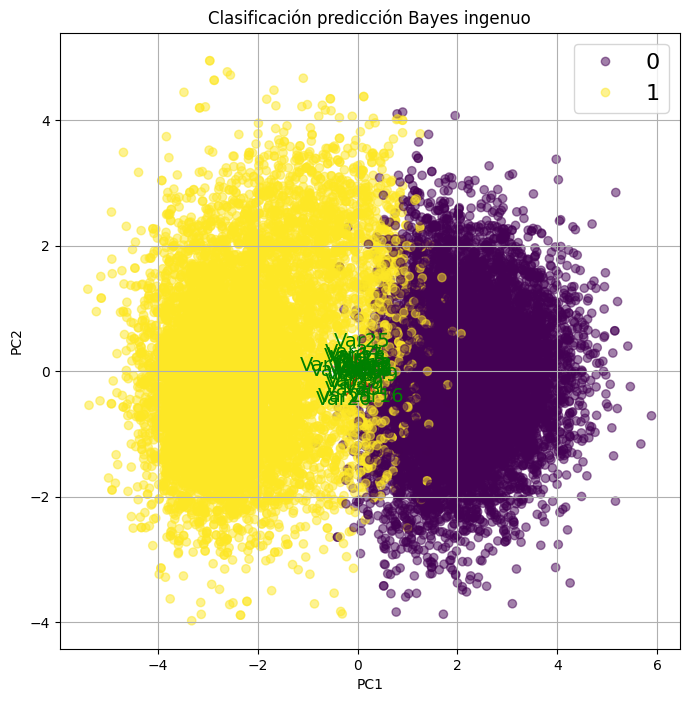

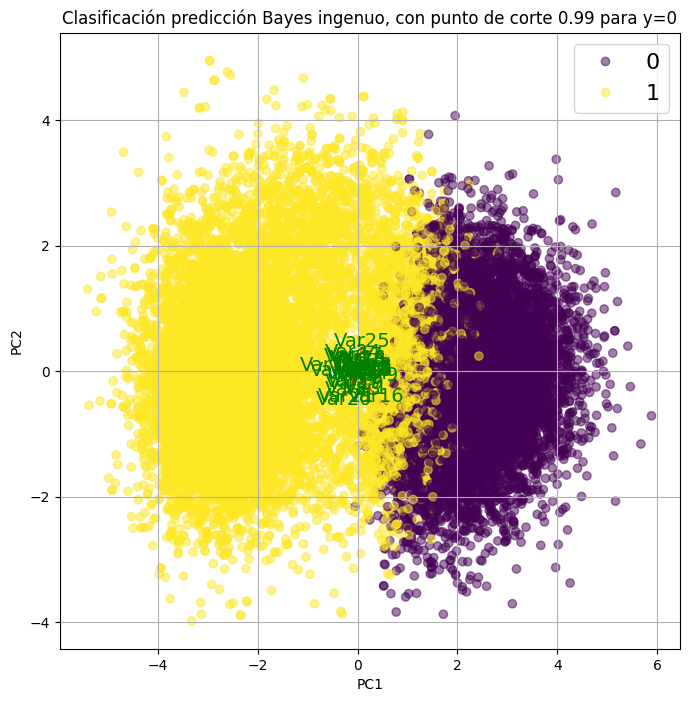

In [ ]:

pca = PCA()
pca.fit(X)
x_new = pca.transform(X)


def myplot(score,coeff,clases,labels=None):
    plt.figure()

    x1 = score[:,0]
    x2 = score[:,1]
    n = coeff.shape[0]

    scatter = plt.scatter(x1, x2, c=clases, alpha=0.5)#, cmap=colours)

    # print(scatter.legend_elements())
    # muestra etiquetas de las clases de la clasificación
    plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

    # flechas de las proyecciones de las variables originales
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center', fontsize=14)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', fontsize=14)



#Grafico las primeras dos componentes principales para cada clasificación

#clasificación real
myplot(x_new[:,0:2], pca.components_, y)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación real")
plt.grid()
plt.show()

#clasificación bayes ingenuo
myplot(x_new[:,0:2], pca.components_, y_pred)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación predicción Bayes ingenuo")
plt.grid()
plt.show()

#clasif. bayes ingenuo con punto de corte 0.99 para y=0
myplot(x_new[:,0:2], pca.components_, y_pred_09)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación predicción Bayes ingenuo, con punto de corte 0.99 para y=0")
plt.grid()
plt.show()


El uso del clasificador Bayesiano Ingenuo en este estudio ha demostrado ser efectivo para la detección de fraudes en transacciones con tarjeta de crédito. A pesar de su suposición simplificadora de independencia condicional entre las variables predictoras, el modelo ha mostrado un buen rendimiento en términos de precisión y capacidad para distinguir entre transacciones legítimas y fraudulentas. Estas características hacen que el clasificador Bayesiano Ingenuo sea una herramienta valiosa para la detección temprana y la prevención del fraude en el uso de tarjetas de crédito.